In [1]:
import os
import tqdm
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

In [2]:
meta=pd.read_csv("/media/sayalialatkar/T9/Sayali/FoundationModels/PsychAD_2_5/MSSM/MSSM_meta_obs.csv")
meta.head()

,barcodekey,Channel,SubID,rep,poolID,round_num,prep,SubID_cs,HTO_n_cs,max_prob,...,Oligo,PC,RB,SMC,VLMC,projID,date,pool,flowcell,lane
0,M00_1061-2-AAACCCAAGTCGGCCT-0,M00_1061-2,M00_1061,2,NPSAD-20210114-C2,3,C,M36816,HTO8,0.987,...,-3.393111,-0.727738,-0.104369,-0.623756,-0.944538,Project-ROU-14698-B01,2021-04-22,NPSAD-20210114,HY32YDSXY,L004
1,M00_1061-2-AAACGCTGTACATTGC-0,M00_1061-2,M00_1061,2,NPSAD-20210114-C2,3,C,M36816,HTO8,0.994,...,-1.715282,-0.553996,0.007478,-0.300827,0.268451,Project-ROU-14698-B01,2021-04-22,NPSAD-20210114,HY32YDSXY,L004
2,M00_1061-2-AAAGAACAGATACTGA-0,M00_1061-2,M00_1061,2,NPSAD-20210114-C2,3,C,M36816,HTO8,1.000,...,-2.495693,-0.842870,-0.259976,-0.632928,-0.892283,Project-ROU-14698-B01,2021-04-22,NPSAD-20210114,HY32YDSXY,L004
3,M00_1061-2-AAAGAACAGGTCTGGA-0,M00_1061-2,M00_1061,2,NPSAD-20210114-C2,3,C,M36816,HTO8,1.000,...,-2.188190,-0.286503,-0.442900,-0.281166,-0.245654,Project-ROU-14698-B01,2021-04-22,NPSAD-20210114,HY32YDSXY,L004
4,M00_1061-2-AAAGAACCACCGTACG-0,M00_1061-2,M00_1061,2,NPSAD-20210114-C2,3,C,M36816,HTO8,1.000,...,-1.752771,-0.322532,-0.237712,0.012816,-0.661094,Project-ROU-14698-B01,2021-04-22,NPSAD-20210114,HY32YDSXY,L004


In [3]:
donors = meta["SubID"].unique()

In [2]:
meth1_save_path = "/media/sayalialatkar/T9/Sayali/FoundationModels/scGPT-main/results/zero-shot/extracted_cell_embeddings_full_body/"
meth2_save_path ="/media/sayalialatkar/T9/Sayali/FoundationModels/scMulan-main/results/zero-shot/extracted_cell_embeddings/"
meth3_save_path = "/media/sayalialatkar/T9/Sayali/FoundationModels/UCE_venv/UCE-main/results/cell_embeddings/extracted_cell_embeddings/"
meth4_save_path  = "/media/sayalialatkar/T9/Sayali/FoundationModels/scFoundation/extracted_cell_embeddings/"
meth5_save_path  = "/media/sayalialatkar/T9/Sayali/FoundationModels/Geneformer_30M/extracted_cell_embeddings/"

In [5]:
temp = pd.read_csv(f"{meth5_save_path}M00_1061.csv", index_col=0)
temp.shape

(2426, 255)

In [21]:
methods=["scGPT","scMulan","UCE","scFoundation","Geneformer"]

In [7]:
all_paths = [meth1_save_path, meth2_save_path, meth3_save_path, meth4_save_path, meth5_save_path]

In [28]:
import matplotlib.pyplot as plt

for i in range(1,len(methods)):
    print (methods[i])
    cells = pd.DataFrame()
    for d in tqdm.tqdm(donors):
        df = pd.read_csv(all_paths[i]+d+".csv", index_col=0)
        cells = pd.concat([cells,df])
    cells.index = meta.index
    adata = ad.AnnData(cells,obs=meta,var=cells.columns.to_frame())

    sc.pp.neighbors(adata, use_rep='X')
    sc.tl.umap(adata)

    sc.pl.umap(adata, 
            color=['class', 'subclass',], 
            frameon=False, 
            wspace=0.4, 
            size=0.8,
            title=[f"{methods[i]}: class", f"{methods[i]}: subclass"])
    plt.savefig(f"./{methods[i]}.png", dpi=300)

    del cells 
    del adata

scMulan


100%|██████████| 1043/1043 [1:50:37<00:00,  6.36s/it]
/home/sayalialatkar/.local/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


: 

In [20]:
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)

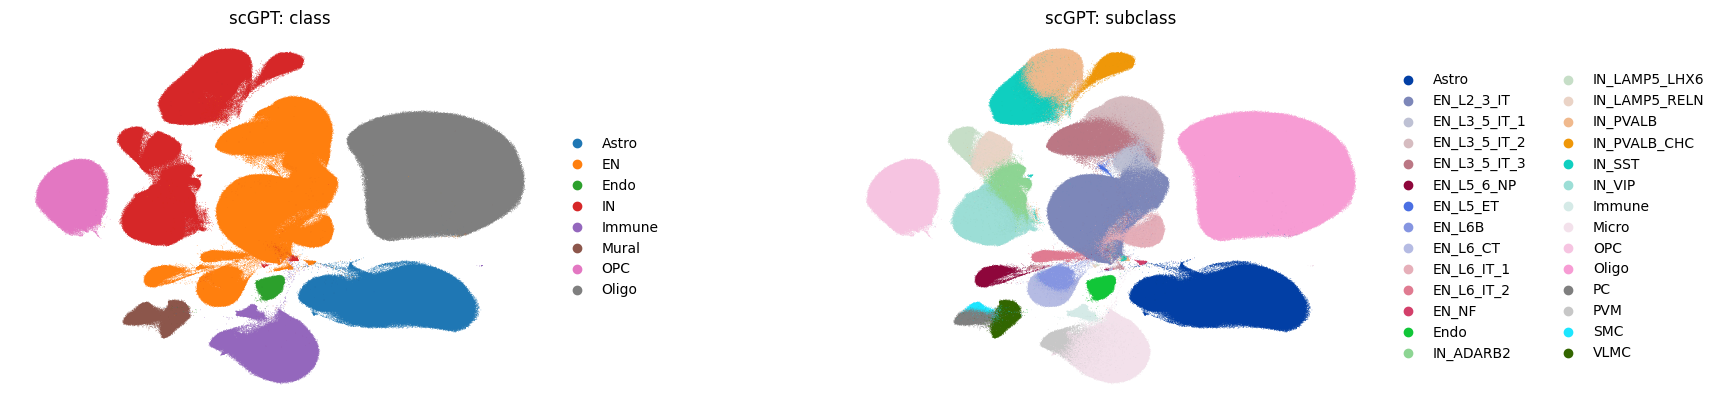

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

sc.pl.umap(adata, 
           color=['class', 'subclass',], 
           frameon=False, 
           wspace=0.4, 
           size=0.8,
           title=[f"{methods[0]}: class", f"{methods[0]}: subclass"])
plt.savefig(f"./{methods[0]}.png", dpi=300)

In [23]:
del cells 
del adata